Cho dữ liệu có chứa chỉ số chiều cao và cân nặng của 200 người được lưu trong têp̣ height_weight.cs

a) Viết chương trình sử dụng thuật toán Dbscan. Lựa chọn eps, min_sample
phân cụm dữ liệu            

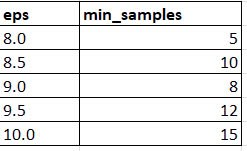



In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from itertools import product
from sklearn.metrics import silhouette_score, davies_bouldin_score

Đọc dữ liệu

In [3]:
df=pd.read_csv(r'D:\Data Mining\Thực Hành 2\height_weight.csv')
df.tail(5)

,Height,Weight
195,145,108
196,157,74
197,177,117
198,166,144
199,193,151


Lựa chọn các giá trị eps và min_samples

In [ ]:
eps_values = [8.0,8.25,8.5,8.75,9.0]
min_samples_values = [5,8,10,12,15]
combinations = list(product(eps_values, min_samples_values))

b) Trực quan hóa các cụm dữ liệu ứng    

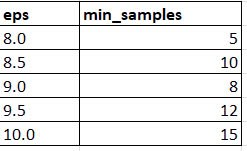

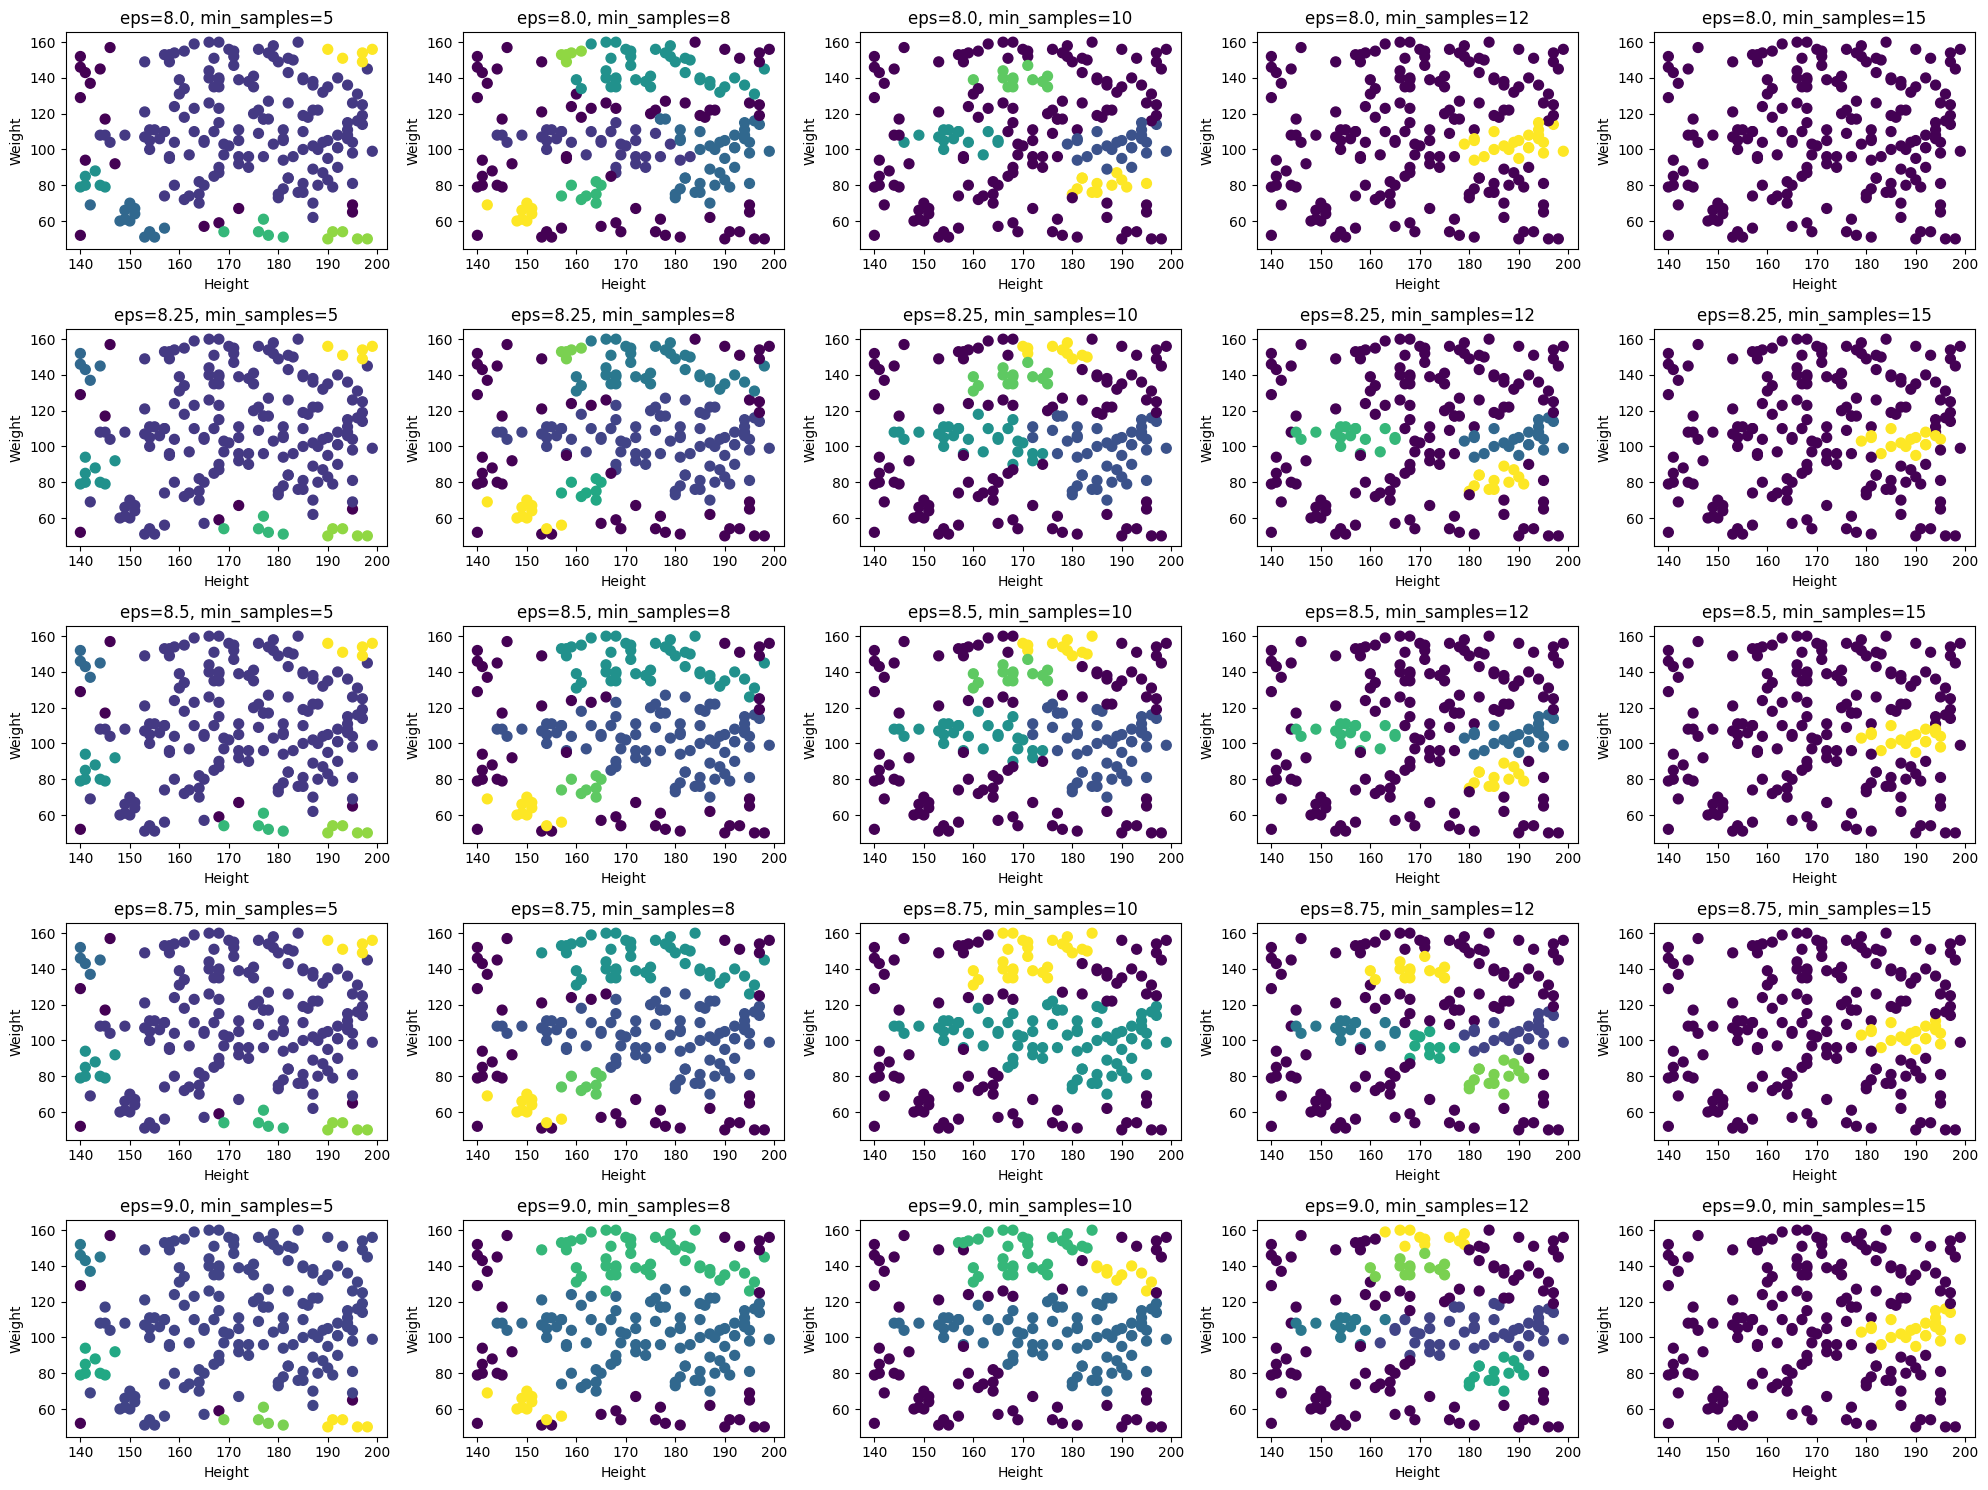

In [34]:
# Phân cụm và trực quan hóa cho từng tổ hợp
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(20, 15))
for (eps, min_samples), ax in zip(combinations, axes.ravel()):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(df.values)
    df['Cluster'] = clusters

    # Vẽ scatter plot
    ax.scatter(df['Height'], df['Weight'], c=clusters, cmap='viridis', s=50, label=f'eps={eps}, min_samples={min_samples}')
    ax.set_title(f'eps={eps}, min_samples={min_samples}')
    ax.set_xlabel('Height')
    ax.set_ylabel('Weight')

plt.tight_layout()
plt.show()

c) Đánh giá kết quả phân cụm.   
Tính tỷ lệ nhiễu (Noise Ratio)  
Thuật toán DBSCAN gán các điểm không thuộc cụm nào làm "nhiễu" với nhãn -1. Tỷ lệ nhiễu được tính bằng công thức:

In [7]:
def calculate_noise_ratio(labels):
    noise_points = np.sum(labels == -1)
    total_points = len(labels)
    return noise_points / total_points

Áp dụng DBSCAN và đánh giá

In [41]:
eps = 8.0
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df.values)


In [42]:
noise_ratio = calculate_noise_ratio(clusters)
print(f"Noise Ratio: {noise_ratio:.2%}")

Noise Ratio: 8.00%


Đánh giá chất lượng cụm bằng cách dùng chỉ số Silhouette, DBI để đánh giá chất lượng cụm.

In [37]:
valid_clusters = clusters[clusters != -1]
valid_features = df.values[clusters != -1]

if len(np.unique(valid_clusters)) > 1:  # Đảm bảo có nhiều hơn 1 cụm
    silhouette = silhouette_score(valid_features, valid_clusters)
    dbi = davies_bouldin_score(valid_features, valid_clusters)
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index: {dbi:.4f}")
else:
    print("Không đủ cụm để tính chỉ số Silhouette và DBI.")

Silhouette Score: 1.0000
Davies-Bouldin Index: 0.0000


Silhouette Score: đo lường sự chặt chẽ trong cụm của mỗi điểm dữ liệu so với cụm lân cận gần nhất.  

    S(i) = ( b(i) - a(i) ) / max ( a(i),b(i) )
    
        a(i): khoảng cách trung bình từ điểm i đến các điểm khác trong cùng cụm
        b(i): khoảng cách trung bình từ điểm i đến các điểm trong cụm gần nhất ( không phải cụm của nó)
        S(i): chỉ số Silhouette của một điểm i, S(i) nằm trong khoảng [-1,1] 
            gần 1: điểm nằm chặt chẽ trong cụm của nó và cách xa cụm khác -> phân cụm tốt.
            gần 0: ranh giới
            âm: điểm bị gán sai cụm -> phân cụm kém
    

Davies-Bouldin Index: Đo lường sự nhỏ gọn của mỗi cụm và sự tách biệt giữa các cụm  

    DBI =1/k (∑ max( S(i) - S(j) ) / d(ij))  
    
        K: Số lượng cụm 
        S(i),S(j): Độ rộng cụm i,j ; thường là bán kính hoặc phương sai 
        d(ij): khoảng cách giữa tâm hai cụm i và j  
            Giá trị lớn: Các cụm chống lấn hoặc không rõ ràng -> Phân cụm kém   
            Giá trị nhỏ: Các cụm nhỏ gọn và tách biệt tốt -> Phân cụm tốt   
       
        

e) So sánh Kmeans và Dbscan

f) Chuẩn hóa dữ liệu bằng MinMaxScaler và StandardScaler. So sánh ảnh hưởng của
việc chuẩn hóa dữ liệu trước và sau khi chuẩn hóa thì ảnh hưởng thế nào đến việc
phân cụm